## This notebook is for the plotting of MACS D$_3$LiIr$_2$O$_6$ data before removal of phonon and elastic backgrounds. 

Annular absorption and normalization are handeled previously

In [1]:
import sys
import os 
sys.path.append("../python scripts/")

import numpy as np 
import matplotlib.pyplot as plt
from mantid.simpleapi import *
import matplotlib
import matplotlib.patheffects as PathEffects
import MDUtils as mdu
from mdtoiexy import make_MD_from_iexy

plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.direction']='in'
plt.rcParams['xtick.minor.visible']=True
plt.rcParams['ytick.minor.visible']=True
plt.rcParams['xtick.top']=True
plt.rcParams['ytick.right']=True
plt.rcParams['font.size']=10
plt.rcParams['xtick.labelsize']=10
plt.rcParams['ytick.labelsize']=10
plt.rcParams['text.usetex']=False
plt.rcParams['font.family']='serif'


def mask_zeros_md(md):
    I = np.copy(md.getSignalArray())
    I[I==0]=np.nan
    md.setSignalArray(I)

cwd = os.getcwd()
#Import files
macs_2K_3p7_fname = cwd+'/macs_iexy/2K_EmptySubtracted_Ei3p7_MACS.iexy'
macs_2K_5_fname = cwd+'/macs_iexy/2K_EmptySubtracted_MACS.iexy'
macs_55K_3p7_fname = cwd+'/macs_iexy/55K_EmptySubtracted_Ei3p7_MACS.iexy'
macs_55K_5_fname = cwd+'/macs_iexy/55K_EmptySubtracted_MACS.iexy'

#Below factors are in a different notebook, originate from elastic bragg peaks
scale_factor_5p0=1.5e-2
scale_factor_3p7=8.0e-2

#scale_factor_5p0=1.0
#scale_factor_3p7=1.0


#Import the iexy files as MDHistoworkspaces
macs_2K_3p7 =  make_MD_from_iexy(macs_2K_3p7_fname,Ei=3.7).clone()
macs_2K_5 =  make_MD_from_iexy(macs_2K_5_fname,Ei=13.7).clone()

macs_55K_3p7 = make_MD_from_iexy(macs_55K_3p7_fname,Ei=3.7).clone()
macs_55K_5 = make_MD_from_iexy(macs_55K_5_fname,Ei=13.7).clone()

macs_55K_5 *=scale_factor_5p0
macs_2K_5 *=scale_factor_5p0
macs_55K_3p7*=scale_factor_3p7 
macs_2K_3p7 *=scale_factor_3p7 

fnames = ['macs_5p0_55K.nxs','macs_5p0_2K.nxs','macs_3p7_55K.nxs','macs_3p7_2K.nxs']

savedir = '../MDHisto_files/'
print(savedir)
for i,md in enumerate([macs_55K_5,macs_2K_5,macs_55K_3p7,macs_2K_3p7]):
    mask_zeros_md(md)
    #Save each in an nxs file for later notebooks.
    SaveMD(md,savedir+fnames[i])

FrameworkManager-[Notice] Welcome to Mantid 6.9.1
FrameworkManager-[Notice] Please cite: http://dx.doi.org/10.1016/j.nima.2014.07.029 and this release: http://dx.doi.org/10.5286/Software/Mantid6.9.1
CheckMantidVersion-[Notice] A new version of Mantid(6.11.0) is available for download from https://download.mantidproject.org
CreateMDHistoWorkspace-[Notice] CreateMDHistoWorkspace started
CreateMDHistoWorkspace-[Notice] CreateMDHistoWorkspace successful, Duration 0.00 seconds
CloneWorkspace-[Notice] CloneWorkspace started
CloneWorkspace-[Notice] CloneWorkspace successful, Duration 0.00 seconds
CloneWorkspace-[Notice] CloneWorkspace started
CloneWorkspace-[Notice] CloneWorkspace successful, Duration 0.00 seconds
CreateMDHistoWorkspace-[Notice] CreateMDHistoWorkspace started
CreateMDHistoWorkspace-[Notice] CreateMDHistoWorkspace successful, Duration 0.00 seconds
CloneWorkspace-[Notice] CloneWorkspace started
CloneWorkspace-[Notice] CloneWorkspace successful, Duration 0.00 seconds
CloneWorksp

## First make plots showing each measurement. 

In [2]:
fig,ax = plt.subplots(2,2,figsize=(3.54,4),subplot_kw={'projection':'mantid'})

vmax=1

ax[0,0].pcolormesh(macs_2K_3p7,vmin=0,vmax=vmax,cmap='Spectral_r',rasterized=True)
ax[0,1].pcolormesh(macs_55K_3p7,vmin=0,vmax=vmax,cmap='Spectral_r',rasterized=True)
ax[1,0].pcolormesh(macs_2K_5,vmin=0,vmax=vmax,cmap='Spectral_r',rasterized=True)
mesh = ax[1,1].pcolormesh(macs_55K_5,vmin=0,vmax=vmax,cmap='Spectral_r',rasterized=True)

ax[0,1].set_ylabel('')
ax[1,1].set_ylabel('')
ax[0,0].set_ylabel('$\hbar\omega$ (meV)')
ax[1,0].set_ylabel('$\hbar\omega$ (meV)')
ax[1,0].set_xlabel('$Q$ ($\AA^{-1}$)')
ax[1,1].set_xlabel('$Q$ ($\AA^{-1}$)')
ax[0,0].set_xlabel('')
ax[0,1].set_xlabel('')
ax[0,1].set_yticklabels([])
ax[1,1].set_yticklabels([])

ax[0,0].set_xlim(0,2.5)
ax[1,0].set_xlim(0,2.5)
ax[0,1].set_xlim(0,2.5)
ax[1,1].set_xlim(0,2.5)

txta = ax[0,0].text(0.1,0.9,'(a)',transform=ax[0,0].transAxes,horizontalalignment='left',\
            verticalalignment='top')
txtb = ax[0,1].text(0.1,0.9,'(b)',transform=ax[0,1].transAxes,horizontalalignment='left',\
            verticalalignment='top')
txtc = ax[1,0].text(0.1,0.9,'(c)',transform=ax[1,0].transAxes,horizontalalignment='left',\
            verticalalignment='top')
txtd = ax[1,1].text(0.1,0.9,'(d)',transform=ax[1,1].transAxes,horizontalalignment='left',\
            verticalalignment='top')
for txt in [txta,txtb,txtc,txtd]:
    txt.set_path_effects([PathEffects.withStroke(linewidth=2,foreground='w')])
#Add a colorbar
l,b,w,h=ax[0,0].get_position().bounds
cax = fig.add_axes([l+0.0125,b+0.5,0.75,0.02])
labelstr='I($Q,\omega$) (b/eV/sr/Ir)'
cbar = plt.colorbar(mesh,orientation='horizontal',cax=cax,label=labelstr)
cax.yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter("%.2f"))
fig.savefig('HLIO_macs_I_summary.pdf',bbox_inches='tight',dpi=300)



In [3]:
dims = macs_2K_5.getNonIntegratedDimensions()
e = mdu.dim2array(dims[1])
print(e)

[ 0.03365669  0.55426338  1.07487008  1.59547678  2.11608347  2.63669017
  3.15729687  3.67790356  4.19851026  4.71911696  5.23972365  5.76033035
  6.28093705  6.80154374  7.32215044  7.84275714  8.36336383  8.88397053
  9.40457723  9.92518392 10.44579062 10.96639732]


FigureCanvasAgg is non-interactive, and thus cannot be shown


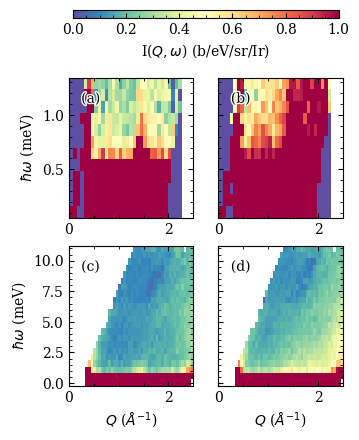

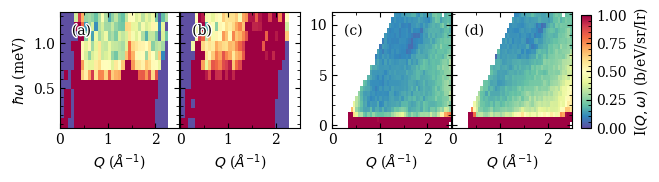

In [4]:
%matplotlib inline
#Version for dissertation
fig,ax = plt.subplots(1,4,figsize=(3.54*2,1.5),subplot_kw={'projection':'mantid'})
fig.subplots_adjust(hspace=0.5)
pos_1 = ax[1].get_position()
pos_0 = ax[0].get_position()
pos_1_w = pos_1.x1 - pos_1.x0
pos_1.x0=pos_0.x0+0.17
pos_1.x1 = pos_1.x0 + pos_1_w

ax[1].set_position(pos_1)


pos_3 = ax[3].get_position()
pos_2 = ax[2].get_position()
#Also want to move ax2 a little to the left. 
pos_2.x0 = pos_2.x0-0.02
pos_2.x1 = pos_2.x1-0.02
ax[2].set_position(pos_2)

pos_3_w = pos_3.x1 - pos_3.x0
pos_3.x0=pos_2.x0+0.17
pos_3.x1 = pos_3.x0 + pos_3_w
ax[3].set_position(pos_3)

vmax=1

ax[0].pcolormesh(macs_2K_3p7,vmin=0,vmax=vmax,cmap='Spectral_r',rasterized=True)
ax[1].pcolormesh(macs_55K_3p7,vmin=0,vmax=vmax,cmap='Spectral_r',rasterized=True)
ax[2].pcolormesh(macs_2K_5,vmin=0,vmax=vmax,cmap='Spectral_r',rasterized=True)
mesh = ax[3].pcolormesh(macs_55K_5,vmin=0,vmax=vmax,cmap='Spectral_r',rasterized=True)

ax[1].set_ylabel('')
ax[3].set_ylabel('')
ax[0].set_ylabel('$\hbar\omega$ (meV)')
ax[2].set_ylabel('')
ax[0].set_xlabel('$Q$ ($\AA^{-1}$)')
ax[1].set_xlabel('$Q$ ($\AA^{-1}$)')
ax[2].set_xlabel('$Q$ ($\AA^{-1}$)')
ax[3].set_xlabel('$Q$ ($\AA^{-1}$)')

ax[1].set_yticklabels([])
ax[3].set_yticklabels([])

ax[0].set_xlim(0,2.5)
ax[1].set_xlim(0,2.5)
ax[2].set_xlim(0,2.5)
ax[3].set_xlim(0,2.5)

txta = ax[0].text(0.1,0.9,'(a)',transform=ax[0].transAxes,horizontalalignment='left',\
            verticalalignment='top')
txtb = ax[1].text(0.1,0.9,'(b)',transform=ax[1].transAxes,horizontalalignment='left',\
            verticalalignment='top')
txtc = ax[2].text(0.1,0.9,'(c)',transform=ax[2].transAxes,horizontalalignment='left',\
            verticalalignment='top')
txtd = ax[3].text(0.1,0.9,'(d)',transform=ax[3].transAxes,horizontalalignment='left',\
            verticalalignment='top')
for txt in [txta,txtb,txtc,txtd]:
    txt.set_path_effects([PathEffects.withStroke(linewidth=2,foreground='w')])
#Add a colorbar
l,b,w,h=ax[3].get_position().bounds
cax = fig.add_axes([l+w+0.0125,b+0.0,0.015,0.75])
labelstr='I($Q,\omega$) (b/eV/sr/Ir)'
cbar = plt.colorbar(mesh,orientation='vertical',cax=cax,label=labelstr)
cax.yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter("%.2f"))

#Fix the x-axis tick labels
for i in range(4):
    axtest = ax[i]
    axtest.set_xticks([0,1,2])
    axtest.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(1))
    axtest.xaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(0.5))
fig.savefig('HLIO_macs_I_summary_dissertation.pdf',bbox_inches='tight',dpi=300)
fig.show()

MinusMD-[Notice] MinusMD started
MinusMD-[Warning] Dimension 0 (Dim1) has different extents in the two MDHistoWorkspaces. The operation may not make sense!
MinusMD-[Warning] Dimension 1 (Dim1) has different extents in the two MDHistoWorkspaces. The operation may not make sense!
MinusMD-[Notice] MinusMD successful, Duration 0.00 seconds
MinusMD-[Notice] MinusMD started
MinusMD-[Warning] Dimension 0 (Dim1) has different extents in the two MDHistoWorkspaces. The operation may not make sense!
MinusMD-[Warning] Dimension 1 (Dim1) has different extents in the two MDHistoWorkspaces. The operation may not make sense!
MinusMD-[Notice] MinusMD successful, Duration 0.00 seconds


FigureCanvasAgg is non-interactive, and thus cannot be shown


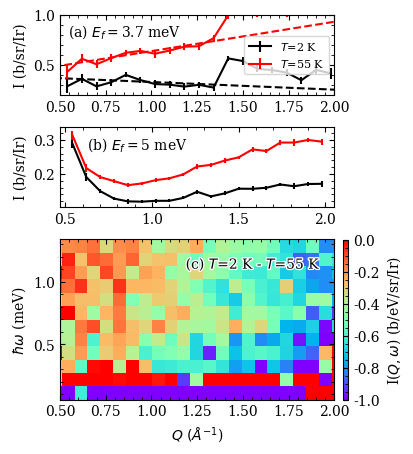

In [86]:
#Get the lowest energy cuts for 2K 3p7 and 2K 5p0 Ef
from cut_mdhisto_powder import cut_MDHisto_powder
from lmfit import Model,Parameters
%matplotlib inline
#scale_5p0=1.0
#scale_3p7=1.0
def befactor(t,omega):
    return (1-np.exp(-omega/(8.62e-2 * t)))

def linear(x,m,b):
    return m*x + b

macs_3p7_sub = macs_2K_3p7-macs_55K_3p7
macs_5_sub = macs_2K_5-macs_55K_5
#Lowest energy cuts of each measurement. 
emin,emax = 0.8,1.3
qmin,qmax,dQ = 0.5,2,0.08
qcut3, icut3, errcut3 = cut_MDHisto_powder(macs_2K_3p7,'|Q|',[qmin,qmax,dQ],[emin,emax])
qcut3_55K, icut3_55K, errcut3_55K = cut_MDHisto_powder(macs_55K_3p7,'|Q|',[qmin,qmax,dQ],[emin,emax])
scale_highT_3 = 1.0#befactor(55.0,np.nanmean([emin,emax]))

emin,emax =2.0,4.0
qmin,qmax,dQ = 0.5,2.0,0.08
qcut5, icut5, errcut5 = cut_MDHisto_powder(macs_2K_5,'|Q|',[qmin,qmax,dQ],[emin,emax])
qcut5_55K, icut5_55K, errcut5_55K = cut_MDHisto_powder(macs_55K_5,'|Q|',[qmin,qmax,dQ],[emin,emax])


scale_highT = 1.0#befactor(55.0,np.nanmean([emin,emax]))
deltaT3=-0.0
deltaT5=-0.00


fig,axs = plt.subplots(3,1,figsize=(3.54,5),height_ratios=[1,1,2],subplot_kw={'projection':'mantid'})
fig.subplots_adjust(hspace=0.3)

model = Model(linear)
params = model.make_params()
params.add('m',value=0,min=-10,max=10)
params.add('b',value=0.5,max=10,min=-10)
wghts3 = 1.0/errcut3
wghts3[qcut3>1.2]=0
wghts3_55K = 1.0/errcut3_55K
wghts3_55K[qcut3_55K>1.2]=0

result3 = model.fit(icut3,x=qcut3,params=params,weights=wghts3,method='powell')
result3_55K = model.fit(icut3_55K,x=qcut3_55K,params=params,weights=wghts3_55K,method='powell')

axs[0].errorbar(qcut3,icut3,yerr=errcut3,color='k',label=r"$T$=2 K")
qeval = np.linspace(0,3,1000)
result3_eval = model.eval(x=qeval,params=result3.params)
result3_55K_eval = model.eval(x=qeval,params=result3_55K.params)

axs[0].plot(qeval,result3_eval,color='k',ls='--')
axs[0].plot(qeval,result3_55K_eval,color='r',ls='--')

axs[0].errorbar(qcut3_55K,icut3_55K*scale_highT_3+deltaT3,yerr=errcut3_55K*scale_highT_3,color='r',label=r"$T$=55 K")

axs[1].errorbar(qcut5,icut5,yerr=errcut5,color='k')

axs[1].errorbar(qcut5_55K,icut5_55K*scale_highT+deltaT5,yerr=errcut5_55K*scale_highT,color='r')

mesh = axs[2].pcolormesh(macs_3p7_sub,vmin=-1,vmax=0.0,cmap='rainbow',rasterized=True)
#Add a colorbar
l,b,w,h=axs[2].get_position().bounds
cax = fig.add_axes([l+w+0.025,b+0.0,0.015,0.32])
labelstr='I($Q,\omega$) (b/eV/sr/Ir)'
cbar = plt.colorbar(mesh,orientation='vertical',cax=cax,label=labelstr)
cax.yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter("%.1f"))

axs[2].set_xlabel(r"$Q$ $(\AA^{-1}$)")
axs[2].set_ylabel(r"$\hbar\omega$ (meV)")

axs[0].text(0.03,0.9,'(a) '+r"$E_f=$3.7 meV",horizontalalignment='left',verticalalignment='top',transform=axs[0].transAxes)
axs[1].text(0.1,0.9,'(b) '+r"$E_f=$5 meV",horizontalalignment='left',verticalalignment='top',transform=axs[1].transAxes)
txtc = axs[2].text(0.95,0.9,'(c) '+r"$T$=2 K - $T$=55 K",horizontalalignment='right',verticalalignment='top',transform=axs[2].transAxes)
txtc.set_path_effects([PathEffects.withStroke(linewidth=2,foreground='w')])

axs[0].set_ylabel(r"I (b/sr/Ir)")
axs[1].set_ylabel(r"I (b/sr/Ir)")
axs[0].set_ylim(0.2,1)
axs[0].set_xlim(0.5,2)
axs[0].legend(fontsize=8)
axs[2].set_xlim(0.5,2)
fig.savefig("SI_macs_dircuts.pdf",bbox_inches='tight',dpi=300)
fig.show()